In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar os arquivos CSV
matriculas_df = pd.read_csv("/content/drive/MyDrive/AED2/bases/matriculas-2024.2.csv", sep=";")
turmas_df = pd.read_csv("/content/drive/MyDrive/AED2/bases/turmas-2024-2.csv", sep=";")
componentes_df = pd.read_csv("/content/drive/MyDrive/AED2/bases/componentes-curriculares-presenciais.csv", sep=";")
cursos_grad_df = pd.read_csv("/content/drive/MyDrive/AED2/bases/cursos-de-graduacao.csv", sep=";")
cursos_pos_df = pd.read_csv("/content/drive/MyDrive/AED2/bases/cursos-de-pos-graduacao.csv", sep=";")
docentes_df = pd.read_csv("/content/drive/MyDrive/AED2/bases/docentes.csv", sep=";")


In [ ]:
# Concatenando os dataframes dos cursos
cursos_df = pd.concat([cursos_grad_df, cursos_pos_df], ignore_index=True)

In [ ]:
# Mesclar os dataframes para obter o nome das disciplinas e o curso
# Primeiro, conectamos as matrículas com as turmas
matriculas_com_turmas = pd.merge(matriculas_df, turmas_df, left_on="id_turma", right_on="id_turma")

In [ ]:
# Em seguida, conectamos o resultado com os componentes curriculares
maticula_turmas_componentes = pd.merge(matriculas_com_turmas, componentes_df, left_on="id_componente_curricular", right_on="id_componente")

In [ ]:
# E agora conectamos com os cursos
maticula_turmas_componentes_cursos = pd.merge(maticula_turmas_componentes, cursos_df, left_on="id_curso", right_on="id_curso")
maticula_turmas_componentes_cursos.columns

In [ ]:
# Mesclando com o dataframe docentes para obter seus nomes
dados_completos = pd.merge(maticula_turmas_componentes_cursos, docentes_df, left_on="siape", right_on="siape")
dados_completos.columns

Index(['id_turma', 'discente', 'id_curso', 'unidade', 'nota', 'reposicao',
       'faltas_unidade', 'media_final', 'numero_total_faltas', 'descricao',
       'codigo_turma', 'siape', 'matricula_docente_externo', 'observacao',
       'id_componente_curricular', 'ch_dedicada_periodo', 'nivel_ensino_x',
       'campus_turma', 'local', 'ano', 'periodo', 'data_inicio', 'data_fim',
       'descricao_horario', 'total_solicitacoes', 'capacidade_aluno', 'tipo',
       'distancia', 'data_consolidacao', 'agrupadora', 'id_turma_agrupadora',
       'qtd_aulas_lancadas', 'situacao_turma', 'convenio',
       'modalidade_participantes', 'id_componente', 'tipo_componente',
       'codigo', 'nivel', 'nome_x', 'unidade_responsavel_x', 'ch_teorico',
       'ch_pratico', 'ch_estagio', 'ch_total', 'ch_dedicada_docente', 'ch_ead',
       'cr_max_ead', 'permite_horario_flexivel', 'qtd_unidades',
       'procedimentos_avaliacao', 'equivalencia', 'pre_requisito',
       'co_requisito', 'ementa', 'bibliografia',

In [ ]:
# Criar um novo dataframe com as colunas especificadas
dados_filtrados = dados_completos[['discente', 'descricao', 'siape', 'nome', 'nivel_ensino_y', 'codigo', 'nome_x', 'nome_y', 'unidade_responsavel_y','grau_academico', 'modalidade_educacao', 'area_conhecimento']]

# Renomear as colunas para remover o sufixo _x e _y e o sufixo "_educacao"
dados_filtrados = dados_filtrados.rename(columns={
    'nivel_ensino_y': 'nivel_ensino',
    'nome_x': 'nome_disciplina',
    'nome_y': 'nome_curso',
    'unidade_responsavel_y': 'unidade_responsavel',
    'modalidade_educacao': 'modalidade',
    'nome': 'nome_docente'
})

# Exibir as primeiras linhas do novo dataframe
dados_filtrados.head()

,discente,descricao,siape,nome_docente,nivel_ensino,codigo,nome_disciplina,nome_curso,unidade_responsavel,grau_academico,modalidade,area_conhecimento
0,8c069d6e5248b0925944cf38338939ad,INDEFERIDO,2318817.0,AMIRIA BEZERRA BRASIL,GRADUAÇÃO,ARQ0254,POLITICA URBANA E REGIONAL,ARQUITETURA E URBANISMO,CENTRO DE TECNOLOGIA,BACHARELADO,Presencial,Engenharias
1,8c069d6e5248b0925944cf38338939ad,INDEFERIDO,1122924.0,EMANUEL RAMOS CAVALCANTI,GRADUAÇÃO,ARQ0254,POLITICA URBANA E REGIONAL,ARQUITETURA E URBANISMO,CENTRO DE TECNOLOGIA,BACHARELADO,Presencial,Engenharias
2,5c4d3d361b503e2a763e73d4efce0ab8,APROVADO,2318817.0,AMIRIA BEZERRA BRASIL,GRADUAÇÃO,ARQ0254,POLITICA URBANA E REGIONAL,ARQUITETURA E URBANISMO,CENTRO DE TECNOLOGIA,BACHARELADO,Presencial,Engenharias
3,5c4d3d361b503e2a763e73d4efce0ab8,APROVADO,1122924.0,EMANUEL RAMOS CAVALCANTI,GRADUAÇÃO,ARQ0254,POLITICA URBANA E REGIONAL,ARQUITETURA E URBANISMO,CENTRO DE TECNOLOGIA,BACHARELADO,Presencial,Engenharias
4,5c4d3d361b503e2a763e73d4efce0ab8,APROVADO,2318817.0,AMIRIA BEZERRA BRASIL,GRADUAÇÃO,ARQ0254,POLITICA URBANA E REGIONAL,ARQUITETURA E URBANISMO,CENTRO DE TECNOLOGIA,BACHARELADO,Presencial,Engenharias


In [ ]:
dados_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1740878 entries, 0 to 1740877
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   discente             object 
 1   descricao            object 
 2   siape                float64
 3   nome_docente         object 
 4   nivel_ensino         object 
 5   codigo               object 
 6   nome_disciplina      object 
 7   nome_curso           object 
 8   unidade_responsavel  object 
 9   grau_academico       object 
 10  modalidade           object 
 11  area_conhecimento    object 
dtypes: float64(1), object(11)
memory usage: 159.4+ MB


In [ ]:
dados_filtrados.isnull().sum()

,0
discente,0
descricao,0
siape,0
nome_docente,0
nivel_ensino,0
codigo,0
nome_disciplina,0
nome_curso,0
unidade_responsavel,23428
grau_academico,23428


In [ ]:
# Filtrar apenas as matrículas de alunos aprovados
# Usei 'APROVADO' e 'APROVADO POR NOTA' para garantir que as conexões sejam significativas
dados_aprovados = dados_filtrados[dados_filtrados['descricao'].str.contains('APROVADO', case=False)]

# Selecionar as colunas de interesse para o grafo
dados_grafo = dados_aprovados[['discente', 'nome_disciplina']]

print("Dados carregados e filtrados com sucesso!")
print("\nPrimeiras 5 linhas dos dados preparados para o grafo:")
print(dados_grafo.head())

Dados carregados e filtrados com sucesso!

Primeiras 5 linhas dos dados preparados para o grafo:
                           discente             nome_disciplina
2  5c4d3d361b503e2a763e73d4efce0ab8  POLITICA URBANA E REGIONAL
3  5c4d3d361b503e2a763e73d4efce0ab8  POLITICA URBANA E REGIONAL
4  5c4d3d361b503e2a763e73d4efce0ab8  POLITICA URBANA E REGIONAL
5  5c4d3d361b503e2a763e73d4efce0ab8  POLITICA URBANA E REGIONAL
6  5c4d3d361b503e2a763e73d4efce0ab8  POLITICA URBANA E REGIONAL


In [ ]:
# Filtrar as disciplinas do curso de Engenharia de Computação
disciplinas_engenharia_computacao = dados_aprovados[dados_aprovados['nome_curso'] == 'ENGENHARIA DE COMPUTAÇÃO']

# Exibir as primeiras linhas do novo dataframe filtrado
disciplinas_engenharia_computacao.head()

,discente,descricao,siape,nome_docente,nivel_ensino,codigo,nome_disciplina,nome_curso,unidade_responsavel,grau_academico,modalidade,area_conhecimento
45881,11f0ff7e098901cc60e435e4c5d2f5ab,APROVADO,1996111.0,MARTIN PABLO CAMMAROTA,GRADUAÇÃO,ICE1025,NEUROCIÊNCIA BÁSICA NO PROCESSO DE APRENDIZAGEM,ENGENHARIA DE COMPUTAÇÃO,CENTRO DE TECNOLOGIA,BACHARELADO,Presencial,Engenharias
45882,11f0ff7e098901cc60e435e4c5d2f5ab,APROVADO,1996111.0,MARTIN PABLO CAMMAROTA,GRADUAÇÃO,ICE1025,NEUROCIÊNCIA BÁSICA NO PROCESSO DE APRENDIZAGEM,ENGENHARIA DE COMPUTAÇÃO,CENTRO DE TECNOLOGIA,BACHARELADO,Presencial,Engenharias
45883,11f0ff7e098901cc60e435e4c5d2f5ab,APROVADO,1996111.0,MARTIN PABLO CAMMAROTA,GRADUAÇÃO,ICE1025,NEUROCIÊNCIA BÁSICA NO PROCESSO DE APRENDIZAGEM,ENGENHARIA DE COMPUTAÇÃO,CENTRO DE TECNOLOGIA,BACHARELADO,Presencial,Engenharias
251834,35ffd15da303a68dbe3e3d1c512c2501,APROVADO,1753067.0,EFRAIN PANTALEON MATAMOROS,GRADUAÇÃO,ECT1553,"EMPREENDEDORISMO, NEGÓCIOS E GESTÃO DE PROJETO...",ENGENHARIA DE COMPUTAÇÃO,CENTRO DE TECNOLOGIA,BACHARELADO,Presencial,Engenharias
251835,35ffd15da303a68dbe3e3d1c512c2501,APROVADO,1753067.0,EFRAIN PANTALEON MATAMOROS,GRADUAÇÃO,ECT1553,"EMPREENDEDORISMO, NEGÓCIOS E GESTÃO DE PROJETO...",ENGENHARIA DE COMPUTAÇÃO,CENTRO DE TECNOLOGIA,BACHARELADO,Presencial,Engenharias


In [ ]:
disciplinas_engenharia_computacao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2911 entries, 45881 to 1593605
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   discente             2911 non-null   object 
 1   descricao            2911 non-null   object 
 2   siape                2911 non-null   float64
 3   nome_docente         2911 non-null   object 
 4   nivel_ensino         2911 non-null   object 
 5   codigo               2911 non-null   object 
 6   nome_disciplina      2911 non-null   object 
 7   nome_curso           2911 non-null   object 
 8   unidade_responsavel  2911 non-null   object 
 9   grau_academico       2911 non-null   object 
 10  modalidade           2911 non-null   object 
 11  area_conhecimento    2911 non-null   object 
dtypes: float64(1), object(11)
memory usage: 295.6+ KB


In [ ]:
# Selecionar as colunas de interesse para o grafo
dados_grafo_engcomp = disciplinas_engenharia_computacao[['discente', 'nome_disciplina']]

print("Dados carregados e filtrados com sucesso!")
print("\nPrimeiras 5 linhas dos dados preparados para o grafo:")
print(dados_grafo_engcomp.head())

Dados carregados e filtrados com sucesso!

Primeiras 5 linhas dos dados preparados para o grafo:
                                discente  \
45881   11f0ff7e098901cc60e435e4c5d2f5ab   
45882   11f0ff7e098901cc60e435e4c5d2f5ab   
45883   11f0ff7e098901cc60e435e4c5d2f5ab   
251834  35ffd15da303a68dbe3e3d1c512c2501   
251835  35ffd15da303a68dbe3e3d1c512c2501   

                                          nome_disciplina  
45881     NEUROCIÊNCIA BÁSICA NO PROCESSO DE APRENDIZAGEM  
45882     NEUROCIÊNCIA BÁSICA NO PROCESSO DE APRENDIZAGEM  
45883     NEUROCIÊNCIA BÁSICA NO PROCESSO DE APRENDIZAGEM  
251834  EMPREENDEDORISMO, NEGÓCIOS E GESTÃO DE PROJETO...  
251835  EMPREENDEDORISMO, NEGÓCIOS E GESTÃO DE PROJETO...  


In [82]:
# Criar o grafo bipartido
B = nx.Graph()

# Adicionar os nós de estudantes e disciplinas.
# 'nodes' é uma lista com todos os nós.
# 'bipartite' indica a qual conjunto o nó pertence (0 para estudantes, 1 para disciplinas).
discentes = list(dados_grafo_engcomp['discente'].unique())
disciplinas = list(dados_grafo_engcomp['nome_disciplina'].unique())

B.add_nodes_from(discentes, bipartite=0)
B.add_nodes_from(disciplinas, bipartite=1)

# Adicionar as arestas (matrículas aprovadas)
for _, row in dados_grafo_engcomp.iterrows():
    discentes = row['discente']
    disciplinas = row['nome_disciplina']
    B.add_edge(discentes, disciplinas)

# Verificando se o grafo é bipartido
from networkx.algorithms import bipartite
print(f"O grafo é bipartido? {bipartite.is_bipartite(B)}")
print(f"Grafo criado com {B.number_of_nodes()} nós e {B.number_of_edges()} arestas.")

O grafo é bipartido? True
Grafo criado com 346 nós e 937 arestas.


In [64]:
# Contar o número de estudantes e disciplinas
num_discentes = len(discentes)
num_disciplinas = len(disciplinas)
print(f"Número total de estudantes aprovados: {num_discentes}")
print(f"Número total de disciplinas com aprovação: {num_disciplinas}")

Número total de estudantes aprovados: 32
Número total de disciplinas com aprovação: 41


In [62]:
# Calcular o grau de cada nó (estudante e disciplina)
degrees = dict(B.degree())

# Separar os graus para estudantes e disciplinas
discente_degrees = {node: degree for node, degree in degrees.items() if B.nodes[node]['bipartite'] == 0}
disciplina_degrees = {node: degree for node, degree in degrees.items() if B.nodes[node]['bipartite'] == 1}

# Criar um dataframe com os graus das disciplinas
disciplina_degree_df = pd.DataFrame(list(disciplina_degrees.items()), columns=['disciplina', 'grau'])

# Ordenar o dataframe pelo grau em ordem decrescente
disciplina_degree_df = disciplina_degree_df.sort_values(by='grau', ascending=False)

print("\nRank das disciplinas por grau (número de estudantes aprovados):")
display(disciplina_degree_df.head())


Rank das disciplinas por grau (número de estudantes aprovados):


,disciplina,grau
47,CIÊNCIAS E TECNOLOGIAS APLICADAS 3,36
21,"METODOLOGIA CIENTÍFICA, TECNOLÓGICA E EMPREEND...",34
68,LINGUAGEM DE PROGRAMAÇÃO,30
61,PROJETO DE SISTEMAS DE CONTROLE - LABORATÓRIO,29
24,AMBIENTE E DESENVOLVIMENTO,29


In [70]:
# Calculando o grau médio da rede
average_degree = sum(degrees.values()) / B.number_of_nodes()
print(f"Grau médio da rede bipartida: {average_degree:.2f}")

Grau médio da rede bipartida: 5.42


In [78]:
# Calcular a densidade da rede
densidade = nx.density(B)
print(f"Densidade da rede bipartida: {densidade:.4f}")

Densidade da rede bipartida: 0.0157


In [87]:
# Calcular a assortatividade da rede
assortativity_degree = nx.degree_assortativity_coefficient(B)
print(f"Coeficiente de assortatividade por grau: {assortativity_degree:.4f}")

Coeficiente de assortatividade por grau: -0.5020


In [88]:
# Criar as projeções unipartidas
# Projeção do conjunto U
U_nodes = {n for n, d in B.nodes(data=True) if d['bipartite'] == 0}
G_U = bipartite.projected_graph(B, U_nodes)

# Projeção do conjunto V
V_nodes = {n for n, d in B.nodes(data=True) if d['bipartite'] == 1}
G_V = bipartite.projected_graph(B, V_nodes)

# Calcular a assortatividade de grau em cada projeção
assortatividade_U = nx.degree_assortativity_coefficient(G_U)
assortatividade_V = nx.degree_assortativity_coefficient(G_V)

print(f"Assortatividade de grau da projeção U: {assortatividade_U:.4f}")
print(f"Assortatividade de grau da projeção V: {assortatividade_V:.4f}")

Assortatividade de grau da projeção U: 0.1487
Assortatividade de grau da projeção V: -0.1164


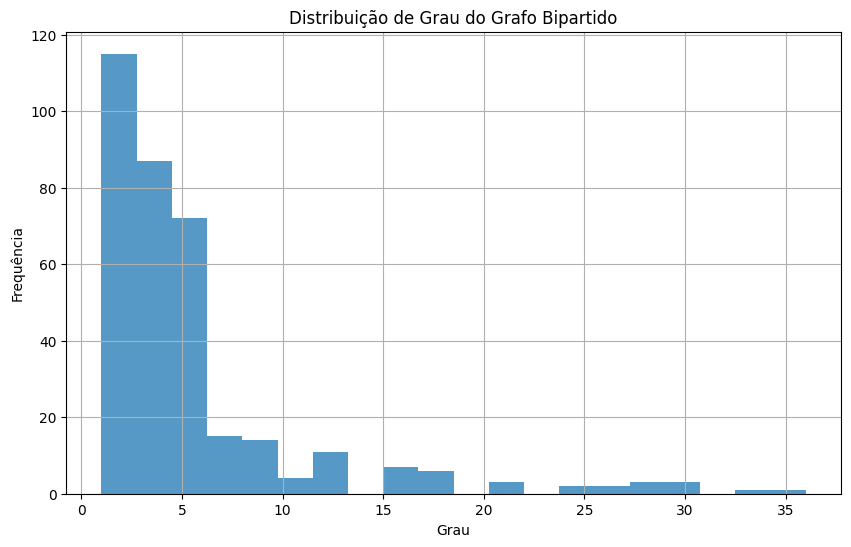

In [89]:
# Distribuição de probabilidade/histograma dos graus
# Obter a sequência de graus de todos os nós
degree_sequence = sorted([d for n, d in B.degree()], reverse=True)

# Criar o histograma
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=20, alpha=0.75)
plt.title('Distribuição de Grau do Grafo Bipartido')
plt.xlabel('Grau')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Top 3 disciplinas por grau: ['CIÊNCIAS E TECNOLOGIAS APLICADAS 3', 'METODOLOGIA CIENTÍFICA, TECNOLÓGICA E EMPREENDEDORA', 'LINGUAGEM DE PROGRAMAÇÃO']


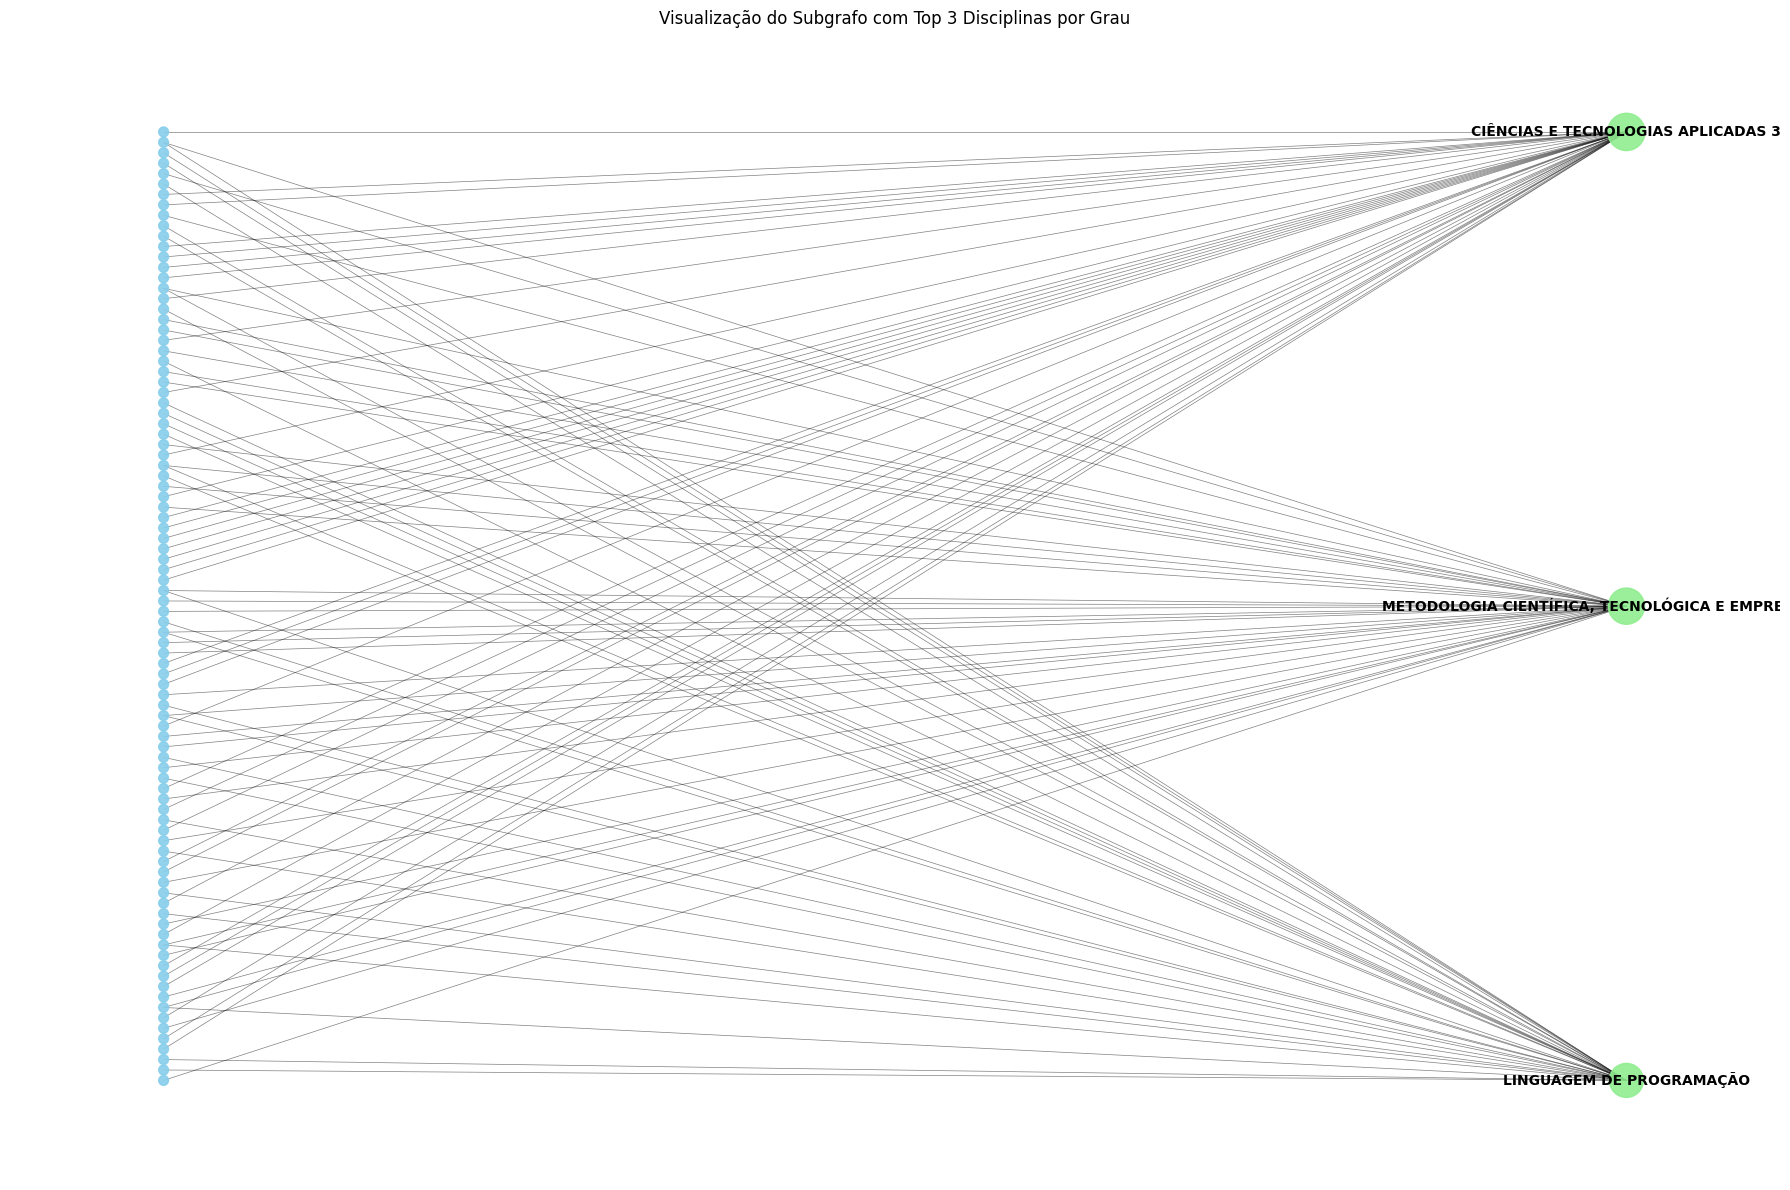


Visualização do subgrafo com 95 nós e 100 arestas criada.


In [97]:
# Identificar as top 3 disciplinas com maior grau
top_disciplinas = disciplina_degree_df.head(3)['disciplina'].tolist()
print(f"Top 3 disciplinas por grau: {top_disciplinas}")

# Encontrar todos os estudantes conectados a essas top disciplinas
estudantes_subgrafo_top = set()
for disciplina in top_disciplinas:
    if disciplina in B:
        for neighbor in B.neighbors(disciplina):
            if B.nodes[neighbor]['bipartite'] == 0: # Check if the neighbor is a student
                estudantes_subgrafo_top.add(neighbor)

# Criar o subgrafo com as top disciplinas e seus estudantes conectados
nodes_subgrafo_top = list(estudantes_subgrafo_top) + top_disciplinas
subgrafo_top = B.subgraph(nodes_subgrafo_top)

# Definir as posições dos nós usando um layout bipartido para o subgrafo
estudantes_no_subgrafo_top = [n for n in subgrafo_top.nodes() if n in estudantes_subgrafo_top]
pos_subgrafo_top = nx.bipartite_layout(subgrafo_top, estudantes_no_subgrafo_top)

# Definir cores e tamanhos dos nósparavisualização
node_colors = []
node_sizes = []
node_labels = {}

for node in subgrafo_top.nodes():
    if node in estudantes_subgrafo_top:
        node_colors.append('skyblue') # Cor para estudantes
        node_sizes.append(50) # Tamanho fixo para estudantes
    elif node in top_disciplinas:
        node_colors.append('lightgreen') # Cor para disciplinas
        # Tamanho do nó proporcional ao grau da disciplina no grafo original
        size = disciplina_degrees.get(node, 1) * 20 # Multiplicar por um fator para tornar visível
        node_sizes.append(size)
        node_labels[node] = node # Adicionar o nome da disciplina como rótulo

# Criar a visualização do subgrafo
plt.figure(figsize=(18, 12)) # Aumentar o tamanho da figura

# Desenhar os nós com cores e tamanhos definidos
nx.draw_networkx_nodes(subgrafo_top, pos_subgrafo_top, node_color=node_colors, node_size=node_sizes, alpha=0.9)

# Desenhar as arestas
nx.draw_networkx_edges(subgrafo_top, pos_subgrafo_top, width=0.5, alpha=0.5)

# Desenhar os rótulos apenas para as disciplinas
nx.draw_networkx_labels(subgrafo_top, pos_subgrafo_top, labels=node_labels, font_size=10, font_weight='bold')

plt.title('Visualização do Subgrafo com Top 3 Disciplinas por Grau')
plt.axis('off') # Remover eixos
plt.tight_layout() # Ajustar o layout para evitar corte de rótulos
plt.show()

print(f"\nVisualização do subgrafo com {subgrafo_top.number_of_nodes()} nós e {subgrafo_top.number_of_edges()} arestas criada.")